In [1]:
import pandas as pd 
import numpy  as np 
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler  
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df['Gender']= LE.fit_transform(df['Gender'])

df['Gender'].unique()

array([1, 0])

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
pca = PCA(n_components=2)

In [7]:
r_data = pca.fit_transform(df)
r_data

array([[-1.09383941e+02,  5.47845404e+00],
       [-1.08202857e+02, -3.49317649e+01],
       [-1.07376292e+02,  3.78408717e+01],
       [-1.06007807e+02, -3.05626965e+01],
       [-1.04980323e+02,  7.29674715e+00],
       [-1.03774723e+02, -2.98012381e+01],
       [-1.02996481e+02,  4.13227699e+01],
       [-1.01426745e+02, -4.70713035e+01],
       [-1.00952191e+02,  5.09237382e+01],
       [-9.93805223e+01, -2.40346077e+01],
       [-9.90706564e+01,  4.09178725e+01],
       [-9.74040858e+01, -4.91523683e+01],
       [-9.67777825e+01,  3.78938689e+01],
       [-9.52523148e+01, -3.02508027e+01],
       [-9.48417033e+01,  3.50274282e+01],
       [-9.34009908e+01, -3.26452221e+01],
       [-9.24499251e+01,  1.31741290e+01],
       [-9.12420152e+01, -2.04349779e+01],
       [-8.99471970e+01,  2.29456992e+01],
       [-8.84752130e+01, -4.81072460e+01],
       [-8.75736418e+01,  1.32190190e+01],
       [-8.63488497e+01, -2.60551150e+01],
       [-8.56046385e+01,  4.49591024e+01],
       [-8.

In [8]:
data = preprocessing.scale(r_data)

In [9]:
data = pd.DataFrame(data,columns=['X','Y'])
data.head()

,X,Y
0,-1.730708,0.208398
1,-1.712020,-1.328786
2,-1.698942,1.439447
3,-1.677289,-1.162589
4,-1.661032,0.277564


In [10]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Sum of squared error')

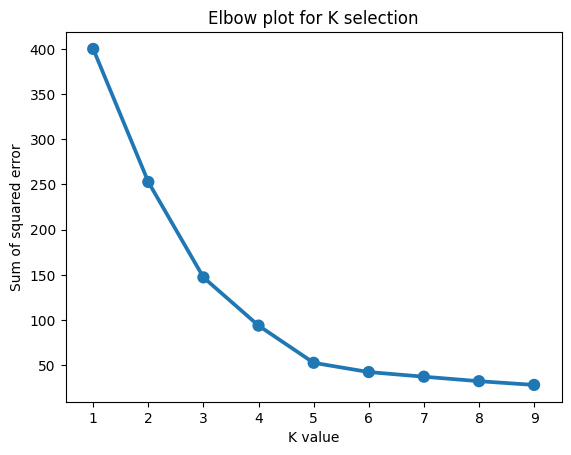

In [11]:
sns.pointplot(x=np.arange(1,10),y=sse)
plt.title('Elbow plot for K selection')
plt.xlabel('K value')
plt.ylabel('Sum of squared error')

In [12]:
!pip install kneed

In [13]:
from kneed import KneeLocator
kl = KneeLocator(np.arange(1,10), sse, S=1.0, curve="convex", direction="decreasing")
print(kl.elbow)

4


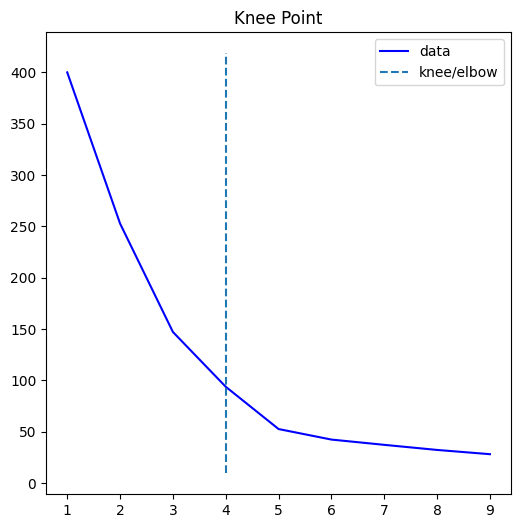

In [14]:
kl.plot_knee()

In [15]:
db=DBSCAN(eps=1.0,metric='euclidean')

In [16]:
pr=db.fit_predict(data)

In [17]:
data['cluster']=pr

In [18]:
data.head()

,X,Y,cluster
0,-1.730708,0.208398,0
1,-1.712020,-1.328786,0
2,-1.698942,1.439447,0
3,-1.677289,-1.162589,0
4,-1.661032,0.277564,0


In [19]:
data['cluster'].value_counts()

cluster
0    200
Name: count, dtype: int64

In [20]:
outliers_data = data[data['cluster']==-1]
cluster1_data = data[data['cluster']==0]
cluster1_data = data[data['cluster']==1]
cluster1_data = data[data['cluster']==2]
cluster1_data = data[data['cluster']==3]

In [21]:
import scipy.cluster.hierarchy as sch

In [22]:
data1 = data.sample(100)

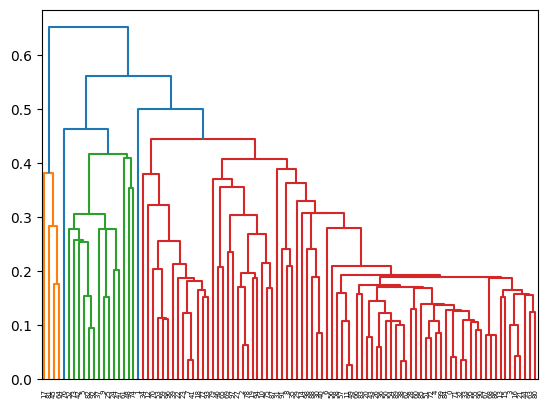

In [23]:
dend = sch.dendrogram(sch.linkage(data1.values,method='single'))

In [24]:
H = AgglomerativeClustering(n_clusters=2, linkage='single', affinity='euclidean')

In [25]:
pred = H.fit_predict(data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
temp = data

In [27]:
temp['cluster'].value_counts()

cluster
0    200
Name: count, dtype: int64

In [28]:
temp1 = temp[temp['cluster']==0]
temp2 = temp[temp['cluster']==1]

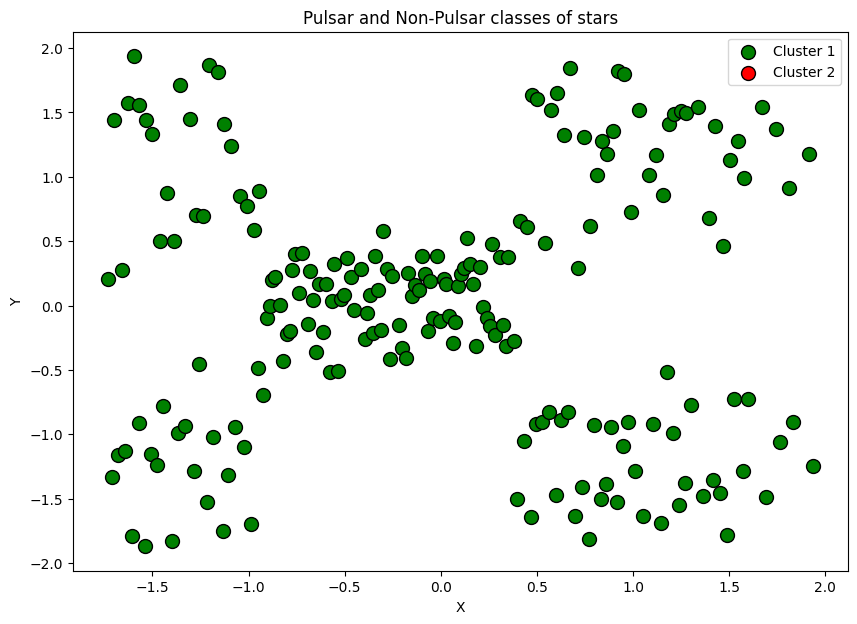

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(temp1.values[:,0],temp1.values[:,1],color="green",label='Cluster 1', edgecolors='black',s=100)
plt.scatter(temp2.values[:,0],temp2.values[:,1],color="red",label='Cluster 2', edgecolors='black',s=100)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulsar and Non-Pulsar classes of stars')
plt.legend()

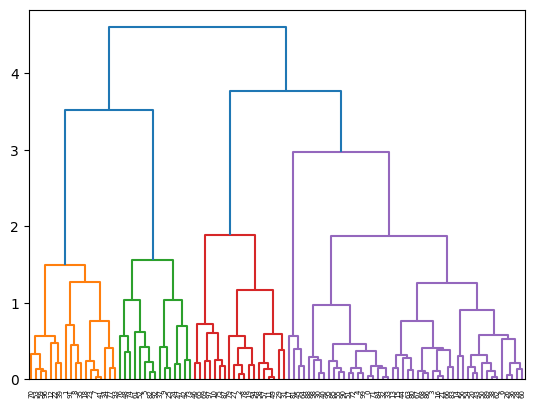

In [30]:
dend = sch.dendrogram(sch.linkage(data1.values,method='complete'))

In [31]:
H = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='euclidean')

In [32]:
pred = H.fit_predict(data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [33]:
temp = data

In [34]:
temp['cluster'] = pred

In [35]:
temp['cluster'].value_counts()

cluster
0    134
1     66
Name: count, dtype: int64

In [36]:
temp1 = temp[temp['cluster']==0]
temp2 = temp[temp['cluster']==1]

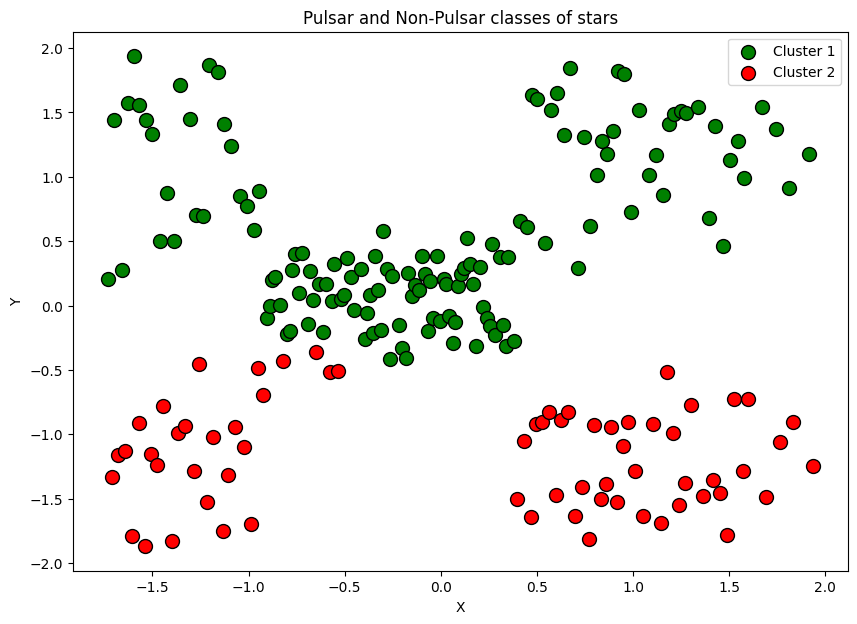

In [37]:
plt.figure(figsize=(10,7))
plt.scatter(temp1.values[:,0],temp1.values[:,1],color="green",label='Cluster 1', edgecolors='black',s=100)
plt.scatter(temp2.values[:,0],temp2.values[:,1],color="red",label='Cluster 2', edgecolors='black',s=100)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulsar and Non-Pulsar classes of stars')
plt.legend()